### 항공기 탑승객 수요 예측(LSTM)

In [3]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [5]:
# 데이터 불러오기
data_path = 'dataset/airline.csv'  # 데이터 경로
df = pd.read_csv(data_path)

# 데이터 확인
print(df.head())

         date  count
0  1949-01-01    112
1  1949-02-01    118
2  1949-03-01    132
3  1949-04-01    129
4  1949-05-01    121


In [26]:
# 날짜(Date)와 탑승객 수(count) 열의 이름 설정 및 변환
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

KeyError: 'date'

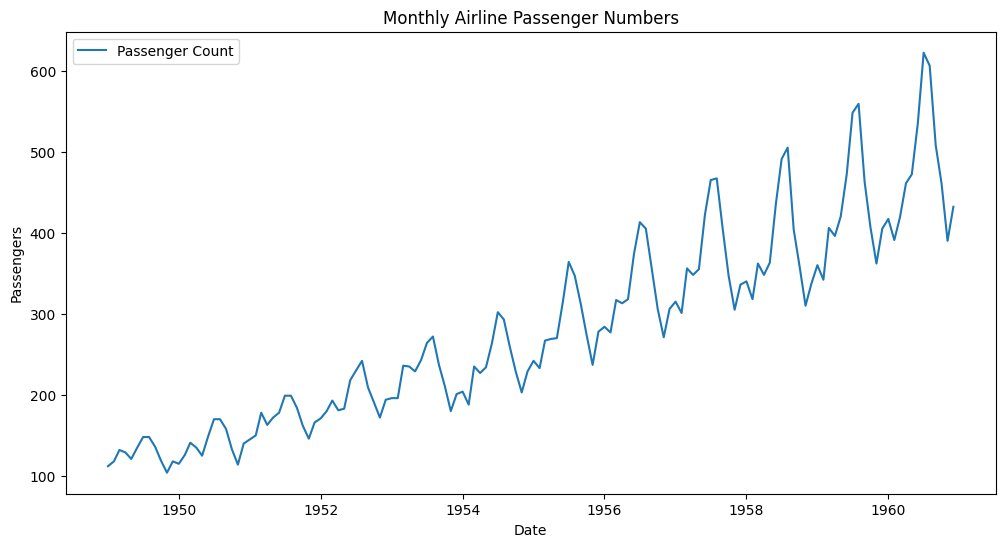

In [27]:
# 데이터 시각화
plt.figure(figsize=(12, 6))
plt.plot(df['count'], label='Passenger Count')
plt.title('Monthly Airline Passenger Numbers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

In [28]:
# 데이터 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['count']])

In [29]:
# 데이터셋 분리 (학습 데이터와 테스트 데이터)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [30]:
# 시계열 데이터셋 생성 함수
def create_dataset(data, time_step=12):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step])
        y.append(data[i+time_step])
    return np.array(X), np.array(y)

In [31]:
time_step = 12  # 12개월 단위로 예측
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [32]:
# LSTM 입력에 맞게 데이터 형태 변경
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [33]:
# LSTM 모델 생성
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

In [34]:
# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

In [40]:
# 모델 학습
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

Epoch 1/100
4/4 [==============================] - 0s 28ms/step - loss: 71375.0312 - val_loss: 219917.5938
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 70436.2344 - val_loss: 216065.6562
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 67944.7969 - val_loss: 211071.1719
Epoch 4/100
4/4 [==============================] - 0s 16ms/step - loss: 64926.9609 - val_loss: 205719.0938
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 62154.5977 - val_loss: 200690.7969
Epoch 6/100
4/4 [==============================] - 0s 18ms/step - loss: 59574.7188 - val_loss: 195889.7500
Epoch 7/100
4/4 [==============================] - 0s 15ms/step - loss: 57079.2734 - val_loss: 191090.0156
Epoch 8/100
4/4 [==============================] - 0s 16ms/step - loss: 54653.3320 - val_loss: 186225.3125
Epoch 9/100
4/4 [==============================] - 0s 15ms/step - loss: 52184.0664 - val_loss: 181292.0000
Epoch 10/100
4/4 [===================

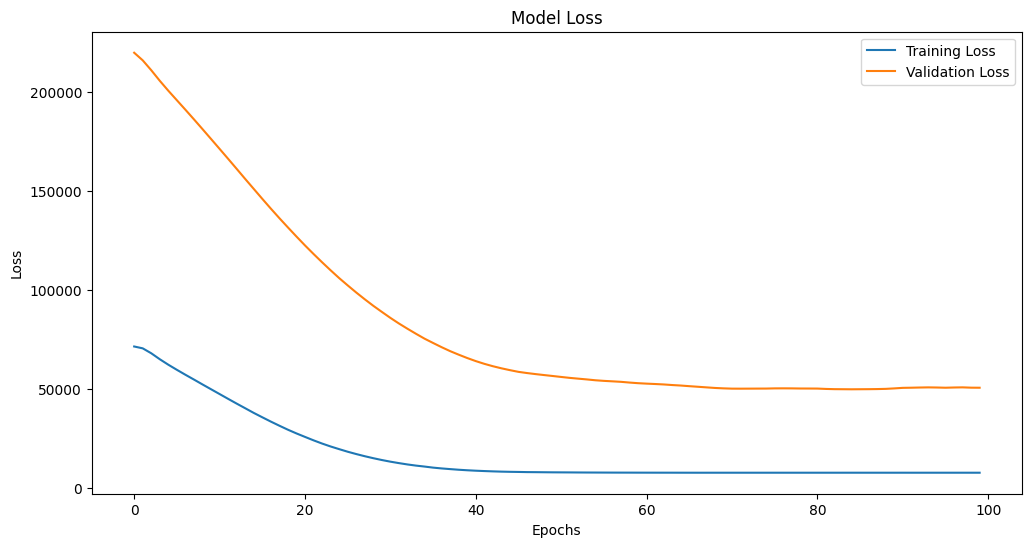

In [41]:
# 학습 과정 시각화
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
# 테스트 데이터 예측
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [43]:
# 예측값 역정규화
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

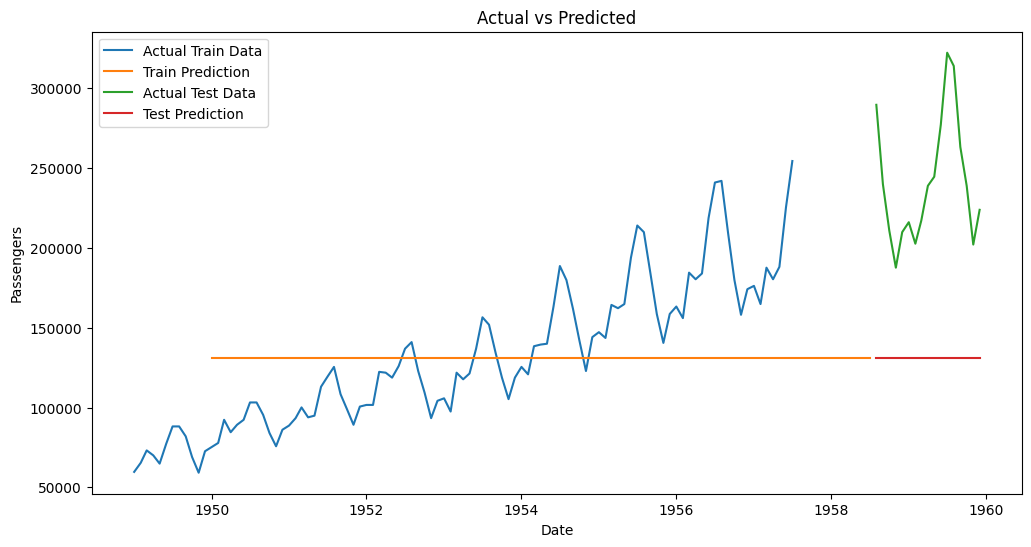

In [44]:
# 예측 결과 시각화
plt.figure(figsize=(12,6))
plt.plot(df.index[:len(y_train)], y_train, label='Actual Train Data')
plt.plot(df.index[time_step:len(train_predict) + time_step], train_predict, label='Train Prediction')
plt.plot(df.index[len(train_data):len(train_data) + len(test_predict)], y_test, label='Actual Test Data')
plt.plot(df.index[len(train_data):len(train_data) + len(test_predict)], test_predict, label="Test Prediction")
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()